In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from Frozen_Lake import FrozenLakeEnv
%matplotlib notebook

In [2]:
env = FrozenLakeEnv()
t = 0

In [3]:
def get_q_values(v_values, gamma):
    q_values = {}
    for state in env.get_all_states():
        q_values[state] = {}
        for action in env.get_possible_actions(state):
            q_values[state][action] = 0
            for next_state in env.get_next_states(state, action):
                q_values[state][action] += env.get_transition_prob(state, action, next_state) * env.get_reward(state, action, next_state)
                q_values[state][action] += gamma * env.get_transition_prob(state, action, next_state) * v_values[next_state]
    return q_values

def init_v_values(prev = None):
    if prev != None:
        return prev
    v_values = {}
    for state in env.get_all_states():
        v_values[state] = 0
    return v_values

def init_policy():
    policy = {}
    for state in env.get_all_states():
        policy[state] = {}
        for action in env.get_possible_actions(state):
            policy[state][action] = 1 / len(env.get_possible_actions(state))
    return policy

def policy_evaluation_step(v_values, policy, gamma):
    q_values = get_q_values(v_values, gamma)
    new_v_values = init_v_values()
    for state in env.get_all_states():
        new_v_values[state] = 0
        for action in env.get_possible_actions(state):
            new_v_values[state] += policy[state][action] * q_values[state][action]
    return new_v_values

def policy_evaluation(policy, gamma, eval_iter_n, eps = 0.000001, v_values_prev = None):
    global t
    v_values = init_v_values(v_values_prev)
    for i in range(eval_iter_n):
        v_values_new = policy_evaluation_step(v_values, policy, gamma)
        max_dif = float('-inf')
        t+=1
        for state in v_values:
            max_dif = max(max_dif,np.abs(v_values_new[state]-v_values[state]))
        v_values = v_values_new
        if max_dif < eps:
            break
    q_values = get_q_values(v_values, gamma)
    return q_values, v_values, v_values[(0,0)]

def policy_improvement(q_values):
    policy = {}
    for state in env.get_all_states():
        policy[state] = {}
        argmax_action = None
        max_q_value = float('-inf')
        for action in env.get_possible_actions(state): 
            policy[state][action] = 0
            if q_values[state][action] > max_q_value:
                argmax_action = action
                max_q_value = q_values[state][action]
        policy[state][argmax_action] = 1
    return policy

In [4]:
def validate_policy(policy, gamma=1, runs = 1000, traj_len = 1000):
    total_rewards = []

    for _ in range(runs):
        total_reward = 0
        state = env.reset()
        for step_n in range(traj_len):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)
            total_reward += (gamma**step_n) * reward

            if done:
                break

        total_rewards.append(total_reward)

    return np.mean(total_rewards)

def policy_calculation(iter_n = 100, eval_iter_n = 100, gamma = 0.9):
    policy = init_policy()
    v_values = None
    for _ in range(iter_n):
        q_values, v_values, _ = policy_evaluation(policy, gamma, eval_iter_n, v_values_prev = None)
        policy = policy_improvement(q_values)
    return policy

In [5]:
t = 0
iter_n = 10
eval_iter_n = 2000
gamma_to_test = [0.9995,0.9999, 1]
gamma_to_val = [0.9995,0.9999, 1]
mean_revard_gamma = [[0 for _ in range(len(gamma_to_val))] for _ in range(len(gamma_to_test))]
for i, gamma in enumerate(gamma_to_test):
    policy = policy_calculation(iter_n, eval_iter_n, gamma)
    for j, gamma_val in enumerate(gamma_to_val):
        _, _, rew = policy_evaluation(policy,gamma_val,eval_iter_n)
        
        mean_revard_gamma[i][j] = rew
        print(i,j,rew)
        
print('total eval_iter_n =',t)
mean_revard_gamma = np.array(mean_revard_gamma)

0 0 0.9146783960216123
0 1 0.9769204788976059
0 2 0.9938508891468485
1 0 0.9119106972837812
1 1 0.9786281919516253
1 2 0.9968033270140375
2 0 0.9119106972837812
2 1 0.9786281919516253
2 2 0.9968033270140375
total eval_iter_n = 49860


<IPython.core.display.Javascript object>


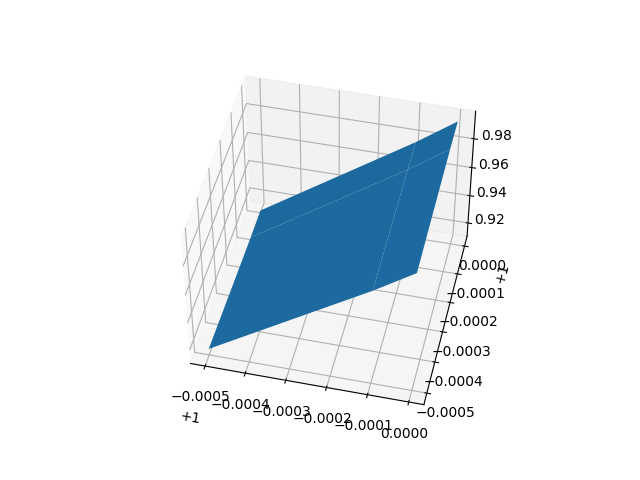

In [6]:
X, Y = np.meshgrid(gamma_to_val,gamma_to_test)
mean_revard_gamma = np.array(mean_revard_gamma)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, np.array(mean_revard_gamma))

<IPython.core.display.Javascript object>


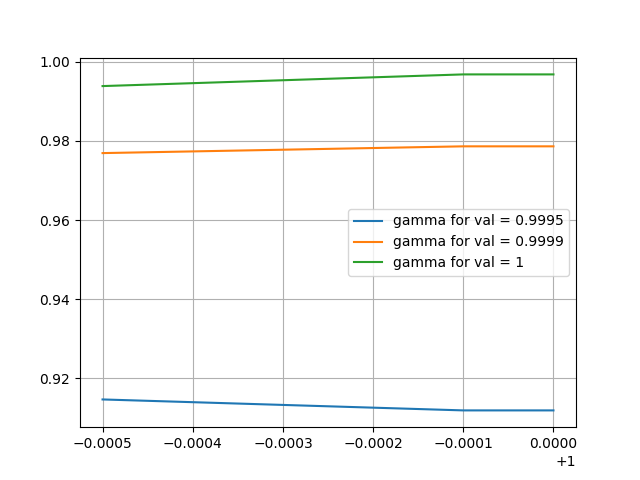

In [7]:
for i in range(len(gamma_to_val)):
    plt.plot(gamma_to_test,mean_revard_gamma[:,i], label = 'gamma for val = '+str(gamma_to_val[i]))
plt.grid(True)
plt.legend()

In [23]:
plt.savefig('20-2000-selfval_zoom.png',dpi=300,bbox_inches='tight',facecolor='white')

In [8]:
policy

{(0, 0): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (0, 1): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (0, 2): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (0, 3): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 0): {'left': 1, 'down': 0, 'right': 0, 'up': 0},
 (1, 1): {None: 1},
 (1, 2): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (1, 3): {None: 1},
 (2, 0): {'left': 0, 'down': 0, 'right': 0, 'up': 1},
 (2, 1): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (2, 2): {'left': 1, 'down': 0, 'right': 0, 'up': 0},
 (2, 3): {None: 1},
 (3, 0): {None: 1},
 (3, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (3, 2): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (3, 3): {None: 1}}